In [1]:
import pandas as pd
import pandas_alive as pda
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import plotly.express as pex

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df['year'].isnull().sum()

0

In [6]:
df['suicides_no'].isnull().sum()

0

In [7]:
df['population'].isnull().sum()

0

In [8]:
df['suicides/100k pop'].isnull().sum()

0

In [9]:
df['HDI for year'].isnull().sum()

19456

In [10]:
df = df.drop(['HDI for year'], 1)

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [12]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [14]:
df['gdp_for_year'] = df[' gdp_for_year ($) '].str.replace(',', '')

In [15]:
df['gdp_for_year'] = df['gdp_for_year'].astype(np.float64)

In [16]:
df = df.drop([' gdp_for_year ($) '],1)

In [17]:
df.isnull().sum().sum()

0

In [18]:
fig = pex.bar(df, x = "country", y = "suicides_no", color = "country", animation_frame = "year", animation_group = "country", range_y=[0,10000])
fig.update_layout(
    title = "International Suicides Over Time",
    xaxis_title = "Country",
    yaxis_title = "Number of Annual Suicides"
)
fig.show()

In [19]:
male_suicides = df[df.sex == 'male']
female_suicides = df[df.sex == 'female']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



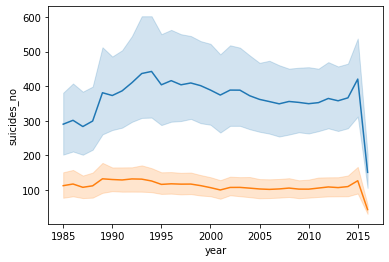

In [20]:
sns.lineplot(male_suicides['year'], male_suicides['suicides_no'])
sns.lineplot(female_suicides['year'], female_suicides['suicides_no'])

In [21]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [22]:
genx = df[df.generation == 'Generation X']
gensilent = df[df.generation == 'Silent']
genGI = df[df.generation == 'G.I Generation']
boomers = df[df.generation == 'Boomers']
millenials = df[df.generation == 'Millenials']
genz = df[df.generation == 'Generation Z']

In [23]:
genx['suicides_no'].mean()

239.2016229712859

In [24]:
gensilent['suicides_no'].mean()

279.9723444374607

In [25]:
genGI['suicides_no'].mean()

nan

In [26]:
boomers['suicides_no'].mean()

457.81523046092184

In [27]:
millenials['suicides_no'].mean()

106.68360711841204

In [28]:
genz['suicides_no'].mean()

10.820408163265306

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

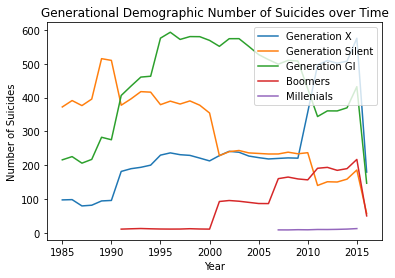

In [29]:
sns.lineplot(genx['year'], genx['suicides_no'], ci = None)
sns.lineplot(gensilent['year'], gensilent['suicides_no'], ci = None)
sns.lineplot(genGI['year'], genGI['suicides_no'], ci = None)
sns.lineplot(boomers['year'], boomers['suicides_no'], ci = None)
sns.lineplot(millenials['year'], millenials['suicides_no'], ci = None)
sns.lineplot(genz['year'], genz['suicides_no'], ci = None)

plt.legend(['Generation X', 'Generation Silent', 'Generation GI', 'Boomers', 'Millenials', 'Generation Z'])
plt.title('Generational Demographic Number of Suicides over Time')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()